In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
reviews = np.load('array_processed.npy')

In [4]:
reviews[0]

'wonderful phone range 845 snapdragon late go sexy phone'

In [5]:
#defined features for classification
features = ['battery', 'ram','dislpay', 'camera', 'storage']

#to count number of occurences of the features
number = {'battery': 0,
             'ram': 0 ,
             'display' : 0,
             'camera' : 0,
             'storage' : 0
             }



In [6]:
#to store reviews seperated wrt features
review_classified = {'battery': [],
             'ram': [] ,
             'display' : [],
             'camera' : [],
             'storage' : []
             }

In [7]:
for line in reviews:
    for feature in list(number.keys()):
        number[feature] += line.count(feature)
        if feature in line:
            review_classified[feature].append(line)
    

In [8]:
for feature in list(review_classified.keys()):
    print(feature ," - ",len(review_classified[feature]))

battery  -  2679
ram  -  464
display  -  1242
camera  -  3376
storage  -  120


In [9]:
from textblob import TextBlob

In [10]:
for i in range(5):
    blob = TextBlob(review_classified['battery'][i])
    print('\n',blob)
    print("\n",blob.sentiment[0])


 expected replacement battery issue get back money though purchase 64 gb storage phone price control pricing keep change everyday get phone replace battery issue third replacement thank fully work properly

 -0.06000000000000001

 amazing pic n video...love phone .. nice n fast .. awesome pic great battery life .. real flagship phone

 0.5666666666666668

 bit skeptical battery come 5000 mah cell believe give best battery performance snapdragon 845 godly

 0.25

 order september 2019 package send oct 2018 year old screen bleed issue battery backup pathetic amazon ensure customer get defect free product official authentic seller totally dissatisfied buy defective

 0.0

 product best value money compare phone purchase far battery excellent lasts almost full day even heavy user processor speed great phonen't become warm even extend use quick charge extremely effective battery get charge quickly even speaker picture quality excellent ring tone library attractive also take get use phone c

In [11]:
review_polarity = {'battery': [],
             'ram': [] ,
             'display' : [],
             'camera' : [],
             'storage' : []
             }



In [12]:
for feature in review_classified.keys():
    positive = []
    negative = []
    for line in review_classified[feature]:
        blob = TextBlob(line)
        score = blob.sentiment[0]
        if score > 0:
            positive.append(line)
        else:
            negative.append(line)
    
    review_polarity[feature].append(positive)
    review_polarity[feature].append(negative)

In [13]:
for feature in review_classified.keys():
    print(feature, " - ", len(review_polarity[feature][0]),len(review_polarity[feature][1]))

battery  -  2453 226
ram  -  423 41
display  -  1096 146
camera  -  3211 165
storage  -  104 16


<BarContainer object of 5 artists>

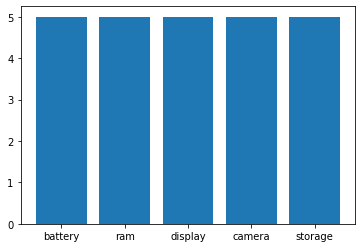

In [14]:
plt.bar(review_polarity.keys(),len(review_polarity.values()))

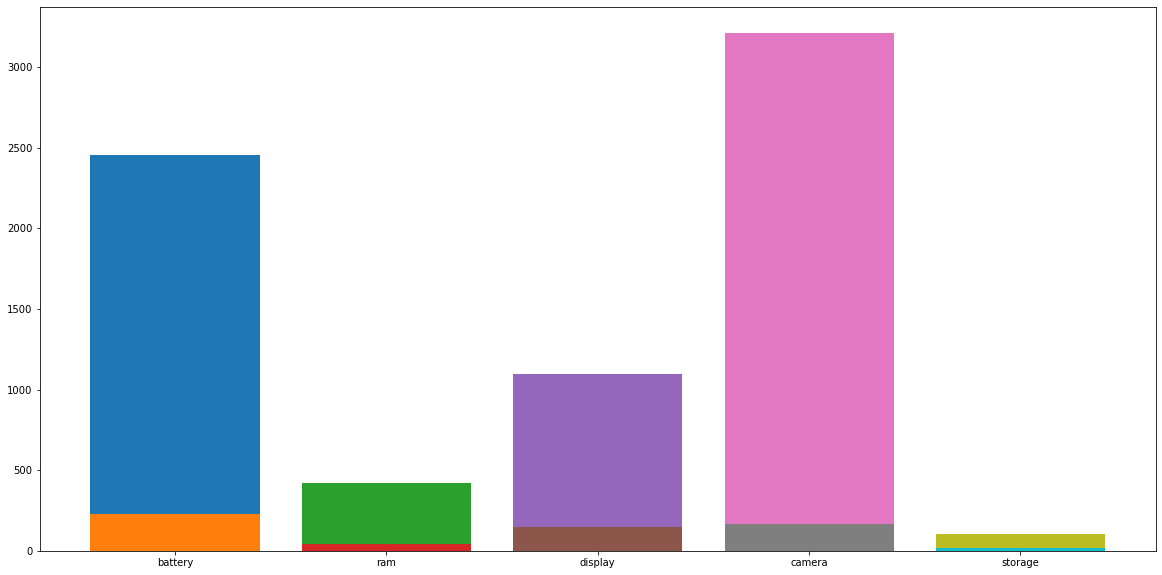

In [15]:
fig = plt.figure(figsize = (20,10))
for feature in review_polarity.keys():
    plt.bar(feature,len(review_polarity[feature][0]))
    plt.bar(feature,len(review_polarity[feature][1]))
plt.show()

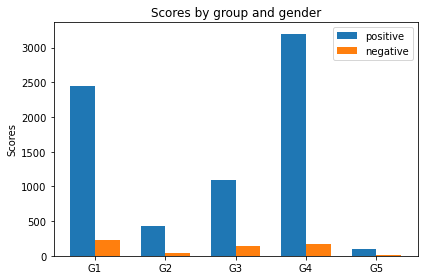

In [16]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = ['G1', 'G2', 'G3', 'G4', 'G5']
men_means = [2448, 424, 1094, 3204, 104]
women_means = [231, 40, 148, 172, 16]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='positive')
rects2 = ax.bar(x + width/2, women_means, width, label='negative')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

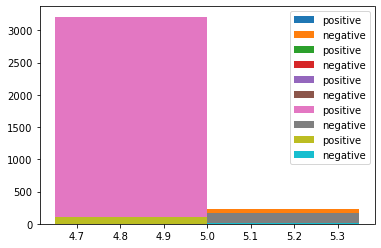

In [17]:
x = 5
width = 0.35
fig1, ax = plt.subplots()
for feature in review_polarity.keys():
    rects1 = ax.bar(x - width/2, len(review_polarity[feature][0]), width, label='positive')
    rects2 = ax.bar(x + width/2, len(review_polarity[feature][1]), width, label='negative')
ax.legend()
plt.show()

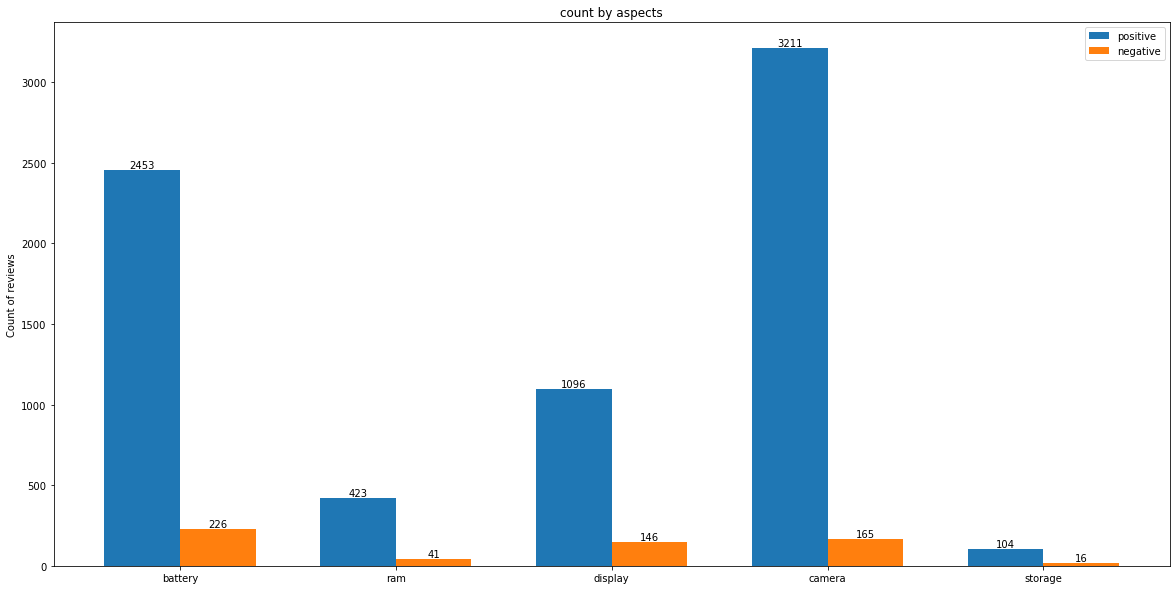

In [18]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = ['battery', 'ram', 'display', 'camera', 'storage']
xp = []
xn = []
for feature in review_polarity.keys():
    xp.append(len(review_polarity[feature][0]))
    xn.append(len(review_polarity[feature][1]))

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig = plt.figure(figsize = (20,10))
ax = fig.subplots()
rects1 = ax.bar(x - width/2, xp, width, label='positive')
rects2 = ax.bar(x + width/2, xn, width, label='negative')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count of reviews')
ax.set_title('count by aspects')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

for rect in rects1 + rects2:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%d' % int(height), ha='center', va='bottom')


plt.savefig('figure.png')
plt.show()


In [19]:
list=[]
def set_rating():
    for i in review_polarity.keys():
        a =len(review_polarity[i][0])
        b= len( review_polarity[i][1])
        x = (a)/(a+b)
        x=x*5
        list.append(x)
        
        
    

In [21]:
#print(len(review_polarity[i][0]))

In [22]:
set_rating()

In [23]:
list

[4.578200821201941,
 4.558189655172414,
 4.412238325281804,
 4.755627962085308,
 4.333333333333334]

In [24]:
 list_new=[]
def set_rating_2():
    for feature in review_classified.keys():
        x=0
        for line in review_classified[feature]:
            blob = TextBlob(line)
            score = blob.sentiment[0] + 0.34
            y=(score+1)*(5)/(2)
            x=x+y
        list_new.append(x/(len(review_classified[feature])))
    
            
            
        
        

In [25]:
set_rating_2()

In [26]:
list_new

[4.253070034486803,
 4.119521917040692,
 4.201667319464616,
 4.371320391535724,
 4.093568851868054]

In [30]:
rev = np.load('review_rating_dict.npy',allow_pickle=True)[()]

In [31]:
x=0
y=0
for i in rev.keys():
    x=x+rev[i]
    y=y+1
print(x/y)

4.296695821185617
